In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

In [3]:
df = pd.read_csv('datasets/stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
features = ['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid.fit(X_train, y_train)

best_clf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


ValueError: 
All the 120 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/home/abhishek/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/abhishek/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/abhishek/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1024, in fit
    super()._fit(
  File "/home/abhishek/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 252, in _fit
    X, y = validate_data(
  File "/home/abhishek/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py", line 2956, in validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "/home/abhishek/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/home/abhishek/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
ValueError: could not convert string to float: 'Male'


In [8]:
dt = DecisionTreeClassifier(min_samples_split = 2, random_state=42, max_depth = 3)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.4f}")

ValueError: could not convert string to float: 'Male'

In [9]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [10]:
confusion_matrix(y_test, y_pred_dt, labels=[0,1])

NameError: name 'y_pred_dt' is not defined

In [11]:
print(classification_report(y_test, y_pred_dt))

NameError: name 'y_pred_dt' is not defined

In [11]:
tree_rules = export_text(dt, feature_names=features)
print(tree_rules)

|--- age <= 67.50
|   |--- age <= 53.50
|   |   |--- age <= 47.50
|   |   |   |--- class: 0
|   |   |--- age >  47.50
|   |   |   |--- class: 0
|   |--- age >  53.50
|   |   |--- avg_glucose_level <= 178.70
|   |   |   |--- class: 0
|   |   |--- avg_glucose_level >  178.70
|   |   |   |--- class: 0
|--- age >  67.50
|   |--- avg_glucose_level <= 269.67
|   |   |--- age <= 75.50
|   |   |   |--- class: 0
|   |   |--- age >  75.50
|   |   |   |--- class: 0
|   |--- avg_glucose_level >  269.67
|   |   |--- class: 1



In [12]:
with open("results/decision_tree_rules.txt", "w") as f:
    f.write(tree_rules)

print("Decision tree rules saved to results/decision_tree_rules.txt")

Decision tree rules saved to results/decision_tree_rules.txt


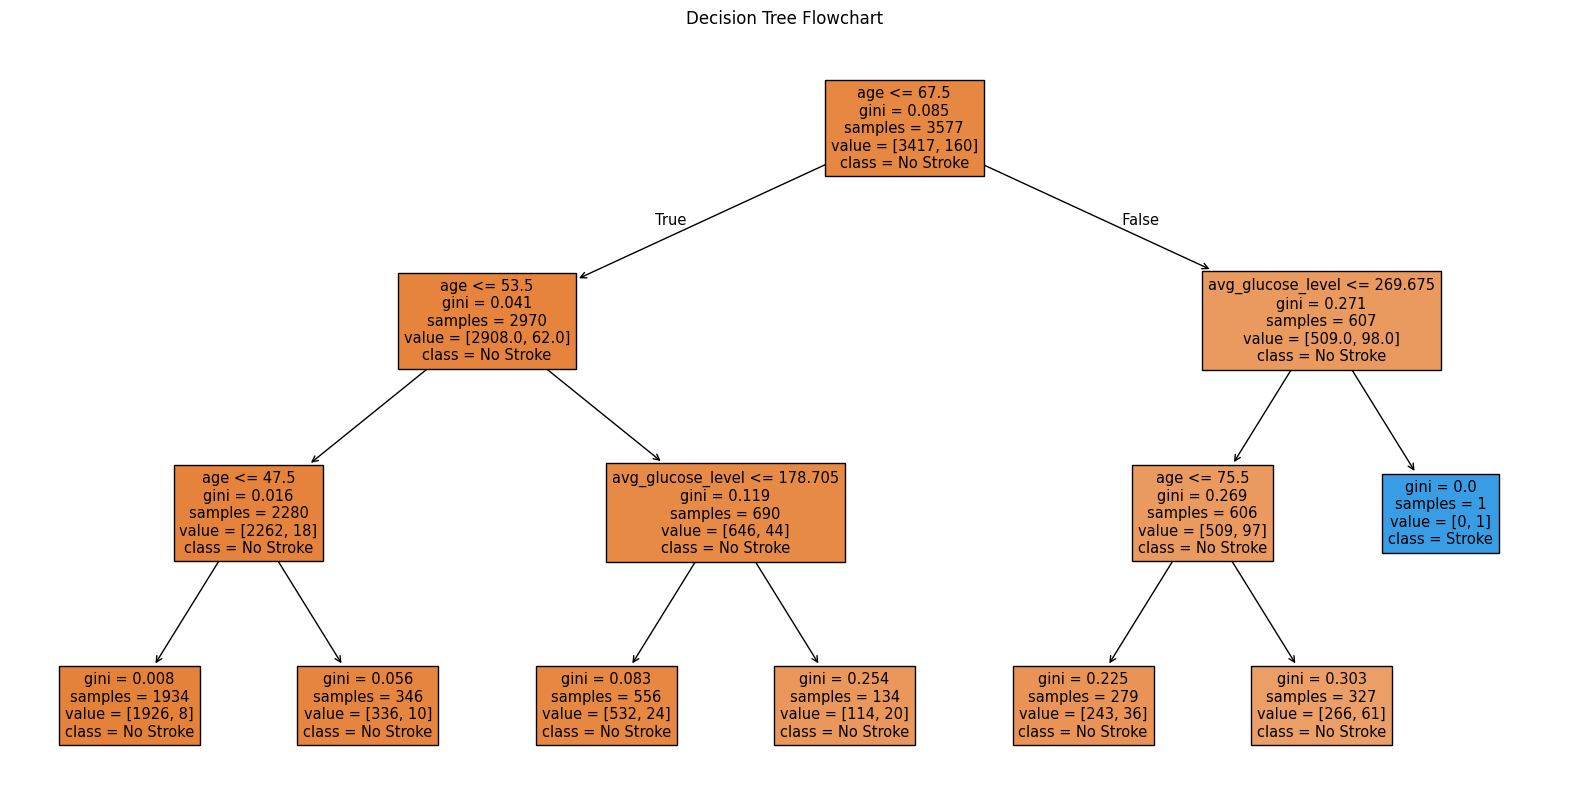

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=features, class_names=["No Stroke", "Stroke"], filled=True)
plt.title("Decision Tree Flowchart")
plt.savefig("results/decision_tree_flowchart.png")
plt.show()


In [14]:
from sklearn.tree import _tree

def get_linear_rules(tree, feature_names, node_index=0, current_rule="IF ", rules=[]):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    if tree_.feature[node_index] != _tree.TREE_UNDEFINED:
        name = feature_name[node_index]
        threshold = tree_.threshold[node_index]

        # Left child rule
        left_rule = f"{current_rule}{name} <= {threshold:.2f} THEN "
        get_linear_rules(tree, feature_names, tree_.children_left[node_index], left_rule, rules)

        # Right child rule
        right_rule = f"{current_rule}{name} > {threshold:.2f} THEN "
        get_linear_rules(tree, feature_names, tree_.children_right[node_index], right_rule, rules)
    else:
        value = tree_.value[node_index]
        predicted_class = value.argmax()
        samples = int(tree_.n_node_samples[node_index])
        rules.append(f"{current_rule}PREDICT class {predicted_class} [samples: {samples}]")

    return rules

# Get linear rules
linear_rules = get_linear_rules(dt, features)

# Save to file
with open("results/linear_decision_rules_dt.txt", "w") as f:
    for rule in linear_rules:
        f.write(rule + "\n")

print("Linear decision rules saved to results/linear_decision_rules_dt.txt")


Linear decision rules saved to results/linear_decision_rules_dt.txt


Random Forest Start

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 3, max_features =  "sqrt",n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}")


Random Forest Accuracy: 0.9419


In [16]:
from sklearn.tree import export_text

# Loop through a few trees in the forest
for i, tree in enumerate(rf.estimators_[:3]):  # Just first 3 trees for brevity
    rules = export_text(tree, feature_names=features)
    with open(f"results/random_forest_tree_{i+1}_rules.txt", "w") as f:
        f.write(rules)
    print(f"Saved rules for Tree {i+1}")


Saved rules for Tree 1
Saved rules for Tree 2
Saved rules for Tree 3


In [17]:
best_tree = None  #to find best tree in random forest.
best_score = 0

for i, tree in enumerate(rf.estimators_):
    pred = tree.predict(X_test)
    score = accuracy_score(y_test, pred)
    if score > best_score:
        best_score = score
        best_tree = tree

print(f"Best individual tree accuracy: {best_score:.4f}")


Best individual tree accuracy: 0.9439


In [19]:
confusion_matrix(y_test,  y_pred_rf, labels = [0,1])

array([[1444,    0],
       [  89,    0]])

In [20]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



/home/abhishek/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/abhishek/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/abhishek/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [20]:
# Get linear rules for best random forest
linear_rules = get_linear_rules(best_tree, features)

# Save to file
with open("results/best_random_rules_linear.txt", "w") as f:
    for rule in linear_rules:
        f.write(rule + "\n")

print("Linear decision rules saved to results/best_random_rules_linear.txt")


Linear decision rules saved to results/best_random_rules_linear.txt


XGBoost start

In [25]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {acc_xgb:.4f}")


ModuleNotFoundError: No module named 'xgboost'

In [22]:
from xgboost import XGBClassifier

# Assuming your XGBoost model is already trained and stored in `xgb`
booster = xgb.get_booster()

# Dump all trees in the model to a text file
booster.dump_model('results/xgboost_rules.txt', with_stats=True)

print("XGBoost Rules saved to 'xgboost_rules.txt'")


XGBoost Rules saved to 'xgboost_rules.txt'


In [23]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_feature_importance(model, model_name, features):
    importances = model.feature_importances_
    feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    feature_df = feature_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
    plt.xlabel('Importance Score')
    plt.title(f'Feature Importance - {model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig(f"results/{model_name.lower().replace(' ', '_')}_feature_importance.png")
    plt.show()


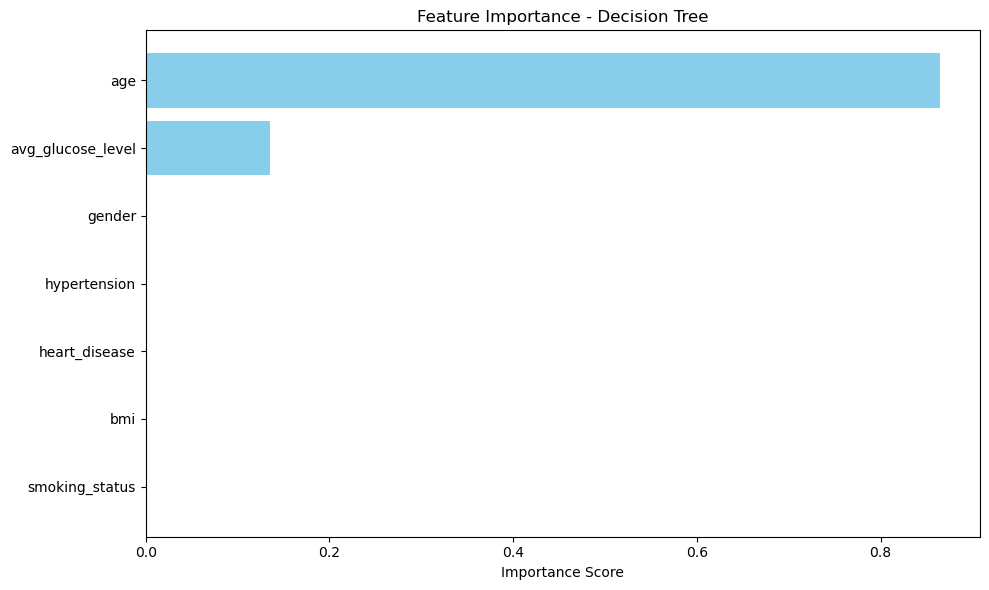

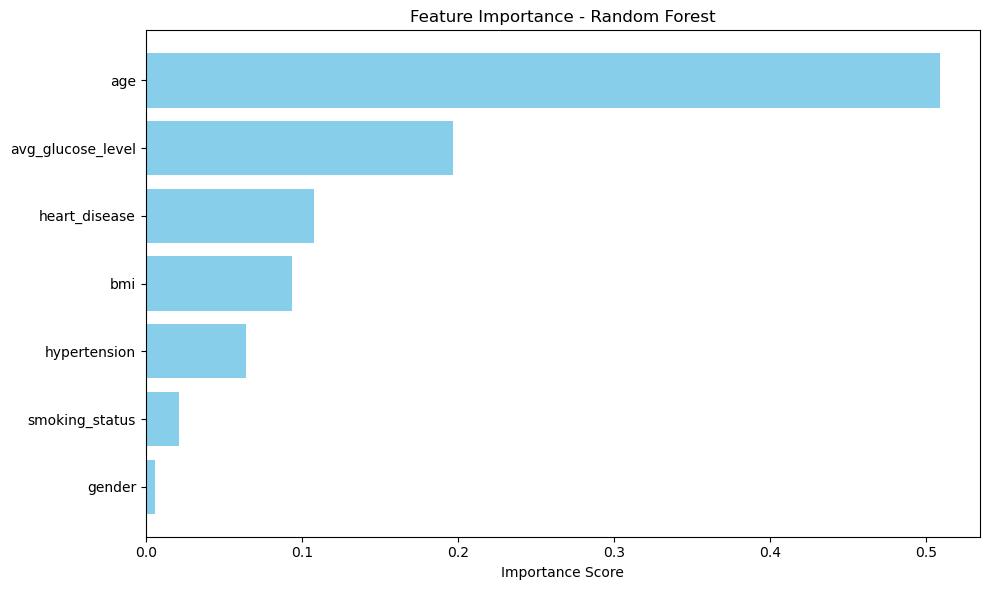

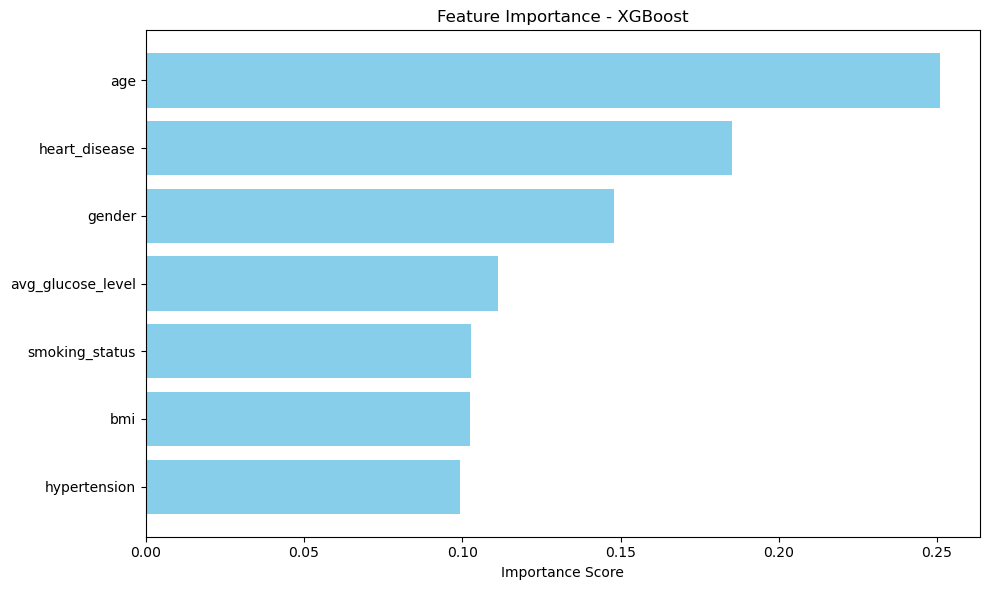

In [24]:
plot_feature_importance(dt, "Decision Tree", features)
plot_feature_importance(rf, "Random Forest", features)
plot_feature_importance(xgb, "XGBoost", features)


In [25]:
# Assuming 'y' is your target variable
y_series = pd.Series(y)
class_counts = y_series.value_counts()

# Display class counts
print("Class distribution (counts):")
print(class_counts)

# Display class distribution as percentages
print("\nClass distribution (percentages):")
print(y_series.value_counts(normalize=True) * 100)  # Multiplied by 100 to get percentage


Class distribution (counts):
0    4861
1     249
Name: count, dtype: int64

Class distribution (percentages):
0    95.127202
1     4.872798
Name: proportion, dtype: float64


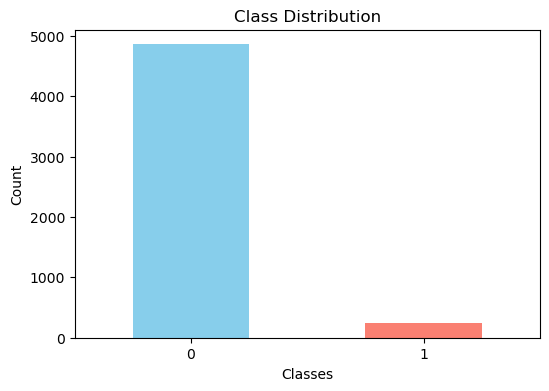

In [26]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(6, 4))
y_series.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [27]:
df_diabetes = pd.read_csv('datasets/diabetes.csv')

In [28]:
df_diabetes.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# Assuming 'y' is your target variable
y_series_dia = pd.Series(df_diabetes['Outcome'])
class_counts = y_series_dia.value_counts()

# Display class counts
print("Class distribution (counts):")
print(class_counts)

# Display class distribution as percentages
print("\nClass distribution (percentages):")
print(y_series_dia.value_counts(normalize=True) * 100)  # Multiplied by 100 to get percentage


Class distribution (counts):
Outcome
0    500
1    268
Name: count, dtype: int64

Class distribution (percentages):
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


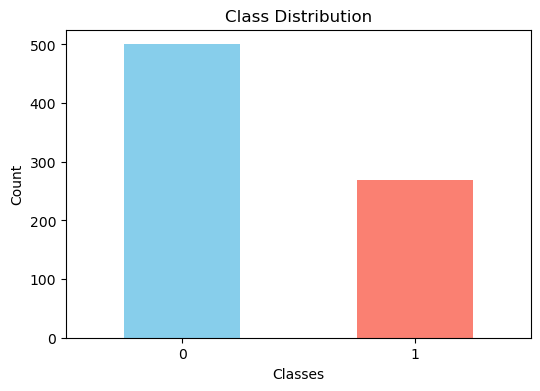

In [30]:
 import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(6, 4))
y_series_dia.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [32]:
df_heart = pd.read_csv('datasets/heart.csv')
df_heart.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:
# Assuming 'y' is your target variable
y_series_heart = pd.Series(df_heart['HeartDisease'])
class_counts = y_series_heart.value_counts()

# Display class counts
print("Class distribution (counts):")
print(class_counts)

# Display class distribution as percentages
print("\nClass distribution (percentages):")
print(y_series_heart.value_counts(normalize=True) * 100)  # Multiplied by 100 to get percentage


Class distribution (counts):
HeartDisease
1    508
0    410
Name: count, dtype: int64

Class distribution (percentages):
HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64


In [39]:
df_cardio = pd.read_csv('datasets/cardio_train.csv', delimiter=';')
df_cardio.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [40]:
# Assuming 'y' is your target variable
y_series_cardio = pd.Series(df_cardio['cardio'])
class_counts = y_series_cardio.value_counts()

# Display class counts
print("Class distribution (counts):")
print(class_counts)

# Display class distribution as percentages
print("\nClass distribution (percentages):")
print(y_series_cardio.value_counts(normalize=True) * 100)  # Multiplied by 100 to get percentage


Class distribution (counts):
cardio
0    35021
1    34979
Name: count, dtype: int64

Class distribution (percentages):
cardio
0    50.03
1    49.97
Name: proportion, dtype: float64
